In [3]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

from helpers import lin_reg
from helpers import box_plot

#Turn off warning messages
import warnings
warnings.filterwarnings('ignore')

# File to Load 
csv_path = Path("../datasets/CVD_cleaned.csv")

dataset_df = pd.read_csv(csv_path)

In [4]:
dataset_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Healthness_Score,Behaviour Score
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150,32.66,14.54,Yes,0,30,16,12,5,3
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165,77.11,28.29,No,0,30,0,4,4,3
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163,88.45,33.47,No,4,12,3,16,5,4
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180,93.44,28.73,No,0,30,30,8,4,5
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191,88.45,24.37,Yes,0,8,4,0,6,4


In [5]:
# Get the unique values for 'Diabetes' column.
diabetes_values = list(dataset_df['Diabetes'].unique())
diabetes_values

['No',
 'Yes',
 'No, pre-diabetes or borderline diabetes',
 'Yes, but female told only during pregnancy']

# Analysis of Individuals with Diabetes

<Axes: title={'center': 'Distribution of individuals having Diabetes vs Not vs Prediabetes vs Females during pregrancy'}, ylabel='Diabetes'>

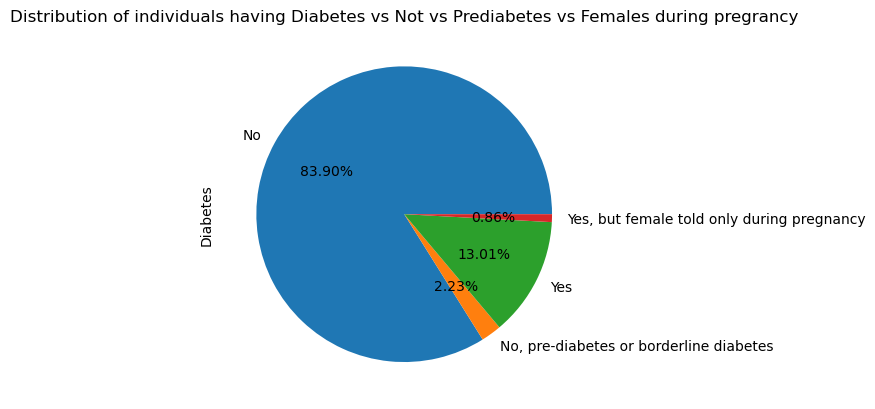

In [6]:
#bar chart for Diabetes

alcohol_df = dataset_df.loc[(dataset_df['Alcohol_Consumption']>0)].groupby('Age_Category')['Alcohol_Consumption'].agg(['mean', 'count', 'max', 'min'])
sex_df = dataset_df.groupby(['Sex'])['Sex'].count()
diabetes_by_age_category = dataset_df.groupby(['Age_Category', 'Diabetes'])['Diabetes'].count()

diabetes_df = dataset_df.groupby('Diabetes')['Diabetes'].count()
diabetes_by_exercise = dataset_df.groupby(['Exercise', 'Diabetes'])['Diabetes'].count()

diabetes_df.plot(kind='pie', autopct='%2.2f%%', title='Distribution of individuals having Diabetes vs Not vs Prediabetes vs Females during pregrancy')

# One Way ANOVA for Weight by Age Category for Individuals with Diabetes

### Alternative Hypothesis:
There is a statistically significant difference in Weight scores based on Age Category for people with Diabetes.

### Null Hypothesis:
The mean Weight by age category are statistically the same.

### Analysis
The One-Way ANOVA test yields a statistic of 176.3 and a p-value of 0.0, therefore we must reject the null hypothesis in favor of the Alternative hypothesis and conclude the means of Weight are statistically influenced by the age category.

In [7]:
group0 = dataset_df.loc[(dataset_df['Age_Category']=='18-24') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group1 = dataset_df.loc[(dataset_df['Age_Category']=='18-24') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group2 = dataset_df.loc[(dataset_df['Age_Category']=='25-29') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group3 = dataset_df.loc[(dataset_df['Age_Category']=='25-29') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group4 = dataset_df.loc[(dataset_df['Age_Category']=='30-34') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group5 = dataset_df.loc[(dataset_df['Age_Category']=='30-34') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group6 = dataset_df.loc[(dataset_df['Age_Category']=='35-39') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group7 = dataset_df.loc[(dataset_df['Age_Category']=='35-39') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group8 = dataset_df.loc[(dataset_df['Age_Category']=='40-44') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group9 = dataset_df.loc[(dataset_df['Age_Category']=='40-44') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group10 = dataset_df.loc[(dataset_df['Age_Category']=='45-49') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group11 = dataset_df.loc[(dataset_df['Age_Category']=='45-49') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group12 = dataset_df.loc[(dataset_df['Age_Category']=='50-54') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group13 = dataset_df.loc[(dataset_df['Age_Category']=='50-54') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group14 = dataset_df.loc[(dataset_df['Age_Category']=='55-59') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group15 = dataset_df.loc[(dataset_df['Age_Category']=='55-59') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group16 = dataset_df.loc[(dataset_df['Age_Category']=='60-64') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group17 = dataset_df.loc[(dataset_df['Age_Category']=='60-64') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group18 = dataset_df.loc[(dataset_df['Age_Category']=='65-69') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group19 = dataset_df.loc[(dataset_df['Age_Category']=='65-69') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group20 = dataset_df.loc[(dataset_df['Age_Category']=='70-74') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group21 = dataset_df.loc[(dataset_df['Age_Category']=='70-74') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group22 = dataset_df.loc[(dataset_df['Age_Category']=='75-79') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group23 = dataset_df.loc[(dataset_df['Age_Category']=='75-79') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

group24 = dataset_df.loc[(dataset_df['Age_Category']=='80+') & (dataset_df['Diabetes'] == 'Yes')]['Weight_(kg)']
group25 = dataset_df.loc[(dataset_df['Age_Category']=='80+') & (dataset_df['Diabetes'] == 'Yes, but female told only during pregnancy')]['Weight_(kg)']

st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19, group20, group21, group22, group23, group24, group25)

F_onewayResult(statistic=176.28855850948418, pvalue=0.0)

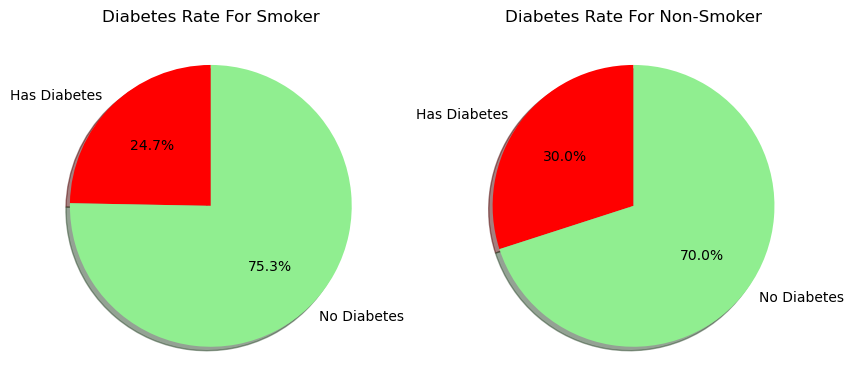

In [8]:
#Pie charts for Smoking_History

smoker_df = dataset_df.loc[dataset_df['Smoking_History'] == "Yes", :]
non_smoker_df = dataset_df.loc[dataset_df['Smoking_History'] == "No", :]

smoker_with_hd_df = smoker_df.loc[smoker_df['Diabetes'] == 'Yes', :]
smoker_with_hd_df = smoker_df.loc[smoker_df['Diabetes'] == 'Yes, but female told only during pregnancy', :]
smoker_without_hd_df = smoker_df.loc[smoker_df['Diabetes'] == 'No', :]
smoker_without_hd_df = smoker_df.loc[smoker_df['Diabetes'] == 'No, pre-diabetes or borderline diabetes', :]

smoker_count = len(smoker_df.index)
smoker_with_hd_count = len(smoker_with_hd_df.index)
smoker_without_hd_count = len(smoker_without_hd_df.index)

smoker_with_hd_percentage = smoker_with_hd_count/smoker_count
smoker_without_hd_percentage = smoker_without_hd_count/smoker_count

non_smoker_with_hd_df = non_smoker_df.loc[non_smoker_df['Diabetes'] == 'Yes', :]
non_smoker_with_hd_df = non_smoker_df.loc[non_smoker_df['Diabetes'] == 'Yes, but female told only during pregnancy', :]
non_smoker_without_hd_df = non_smoker_df.loc[non_smoker_df['Diabetes'] == 'No', :]
non_smoker_without_hd_df = non_smoker_df.loc[non_smoker_df['Diabetes'] == 'No, pre-diabetes or borderline diabetes', :]

non_smoker_count = len(non_smoker_df.index)
non_smoker_with_hd_count = len(non_smoker_with_hd_df.index)
non_smoker_without_hd_count = len(non_smoker_without_hd_df.index)

non_smoker_with_hd_percentage = non_smoker_with_hd_count/non_smoker_count
non_smoker_without_hd_percentage = non_smoker_without_hd_count/non_smoker_count

colors = ["red","lightgreen"]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([smoker_with_hd_percentage, smoker_without_hd_percentage], labels=['Has Diabetes','No Diabetes'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Diabetes Rate For Smoker')

ax2.pie([non_smoker_with_hd_percentage, non_smoker_without_hd_percentage], labels=['Has Diabetes','No Diabetes'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Diabetes Rate For Non-Smoker')

plt.show()

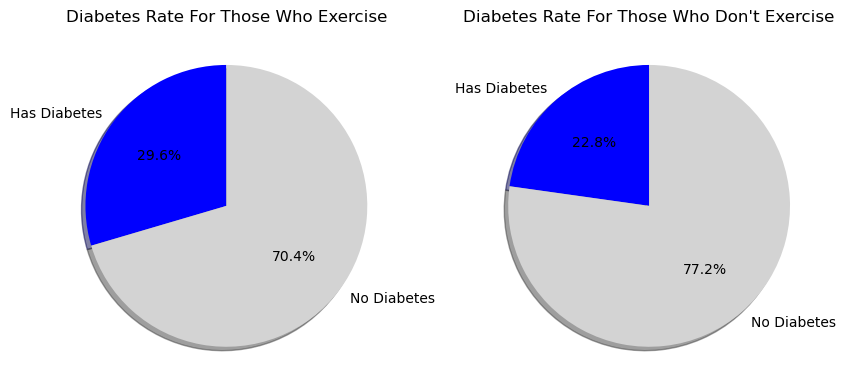

In [9]:
#Pie charts for Exercise
group1 = dataset_df.loc[dataset_df['Exercise'] == "Yes", :]

group1_yes = group1.loc[group1['Diabetes'] == 'Yes', :]
group1_yes = group1.loc[group1['Diabetes'] == 'Yes, but female told only during pregnancy', :]
group1_no = group1.loc[group1['Diabetes'] == 'No', :]
group1_no = group1.loc[group1['Diabetes'] == 'No, pre-diabetes or borderline diabetes', :]


group1_count = len(group1.index)
group1_yes_percent = len(group1_yes.index)/group1_count
group1_no_percent = len(group1_no.index)/group1_count

group2 = dataset_df.loc[dataset_df['Exercise'] == "No", :]

group2_yes = group2.loc[group2['Diabetes'] == 'Yes, but female told only during pregnancy', :]
group2_no = group2.loc[group2['Diabetes'] == 'No, pre-diabetes or borderline diabetes', :]

group2_count = len(group2.index)
group2_yes_percent = len(group2_yes.index)/group2_count
group2_no_percent = len(group2_no.index)/group2_count

colors = ["blue","lightgrey"]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie([group1_yes_percent, group1_no_percent], labels=['Has Diabetes','No Diabetes'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax1.set_title('Diabetes Rate For Those Who Exercise')

ax2.pie([group2_yes_percent, group2_no_percent], labels=['Has Diabetes','No Diabetes'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
ax2.set_title('Diabetes Rate For Those Who Don\'t Exercise')

plt.show()

# Conclusions:

### Diabetes:

The analysis reveals a minimal correlation between diabetes and individuals who maintain consistent smoking or exercise habits. The data suggests that there is little connection between an individual's weight and the likelihood of having diabetes, as observed in the dataset.